In [2]:
import pandas as pd

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

FileNotFoundError: File b'train.csv' does not exist

In [ ]:
train.shape

In [ ]:
test.columns

In [ ]:
train.target.value_counts()

In [4]:
160/250

0.64

In [10]:
# There are two classes with 160 as '1' and 90 as '0'

In [133]:
corrs = train.corr().abs().unstack().sort_values(kind="quicksort").reset_index()

In [134]:
corrs.shape

(91204, 3)

In [135]:
corrs = corrs[corrs['level_0'] != corrs['level_1']]

In [136]:
corrs.shape

(90902, 3)

In [15]:
corrs.tail(10)

,level_0,level_1,0
90892,22,28,0.246062
90893,28,22,0.246062
90894,193,101,0.252825
90895,101,193,0.252825
90896,75,32,0.259315
90897,32,75,0.259315
90898,target,65,0.293846
90899,65,target,0.293846
90900,33,target,0.373608
90901,target,33,0.373608


In [16]:
from sklearn.model_selection import train_test_split

In [5]:
X_train0 = train.drop(['id', 'target'], axis = 1)
y_train0 = train['target']
X_test0  = test.drop('id', axis = 1)

In [264]:
# Converting data into numpy array
X_train0 = X_train0.loc[:,:].values
y_train0 = y_train0.values
X_test0  = X_test0.loc[:,:].values

In [265]:
print('The size of the training set is: {}'.format(X_train0.shape))

The size of the training set is: (250, 300)


In [266]:
Counter(y_train0)

Counter({0.0: 90, 1.0: 160})

In [267]:
print('The size of the test set is: {}'.format(X_test0.shape))

The size of the test set is: (19750, 300)


In [ ]:
## Now dividing the training set into training and test

In [268]:

X_train,  X_test, y_train, y_test = train_test_split(X_train0, y_train0,stratify = y_train0, 
                                                    test_size = 0.25, random_state = 42)

In [269]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((187, 300), (187,), (63, 300), (63,))

# Plain logisitic Regression

In [181]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [270]:
Counter(y_train)
Counter(y_test)

Counter({0.0: 23, 1.0: 40})

In [175]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [271]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
pred = lgr.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[15  8]
 [15 25]]
             precision    recall  f1-score   support

        0.0       0.50      0.65      0.57        23
        1.0       0.76      0.62      0.68        40

avg / total       0.66      0.63      0.64        63



# Logistic Regression and Principal Component Analysis

In [272]:
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components = 2), LogisticRegression(random_state=1))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 23]
 [ 0 40]]
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        23
        1.0       0.63      1.00      0.78        40

avg / total       0.40      0.63      0.49        63



c:\program files\python36\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [186]:
## Correlation Analysis to reduce the number of features

In [273]:
corrs = train.corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs.shape
corrs = corrs[corrs['level_0'] != corrs['level_1']]
corrs.shape
corrs[(corrs['level_0'] =='target') | (corrs['level_1'] == 'target')].tail(50)

,level_0,level_1,0
87958,target,220,0.134738
87959,220,target,0.134738
87960,298,target,0.134760
87961,target,298,0.134760
88158,target,90,0.136230
88159,90,target,0.136230
88160,230,target,0.136263
88161,target,230,0.136263
88348,target,258,0.138332
88349,258,target,0.138332


In [ ]:
# Manually select features based on the correlation of featu

In [354]:
X_train0 = train.drop(['id', 'target'], axis = 1)
y_train0 = train['target']
X_test0  = test.drop('id', axis = 1)

In [355]:
selected_features = ['33', '65','91','117','217']
X_train0 =X_train0[selected_features].values
X_test0 = X_test0[selected_features].values
y_train0 = y_train0.values


In [356]:
X_train0.shape, X_test0.shape

((250, 5), (19750, 5))

In [379]:

X_train,  X_test, y_train, y_test = train_test_split(X_train0, y_train0,stratify = y_train0, 
                                                    test_size = 0.25, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lgr = LogisticRegression(penalty = 'l2')
lgr.fit(X_train, y_train)
pred = lgr.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[14  9]
 [ 4 36]]
             precision    recall  f1-score   support

        0.0       0.78      0.61      0.68        23
        1.0       0.80      0.90      0.85        40

avg / total       0.79      0.79      0.79        63



In [380]:
X_train0 = train.drop(['id', 'target'], axis = 1)
y_train0 = train['target']
X_test0  = test.drop('id', axis = 1)

selected_features = ['33', '65','73','80','91','117','183','217','295']
#selected_features = ['33', '65']
X_train0 =X_train0[selected_features].values


X_test0 = X_test0[selected_features].values
y_train0 = y_train0.values


print(X_train0.shape)
print( X_test0.shape)


X_train,  X_test, y_train, y_test = train_test_split(X_train0, y_train0,stratify = y_train0, 
                                                    test_size = 0.25, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lgr = LogisticRegression()
lgr.fit(X_train, y_train)
pred = lgr.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

(250, 9)
(19750, 9)
[[13 10]
 [ 6 34]]
             precision    recall  f1-score   support

        0.0       0.68      0.57      0.62        23
        1.0       0.77      0.85      0.81        40

avg / total       0.74      0.75      0.74        63



In [390]:
submissions  = pd.read_csv('sample_submission.csv')

In [391]:
submissions['target'].value_counts()

0    19750
Name: target, dtype: int64

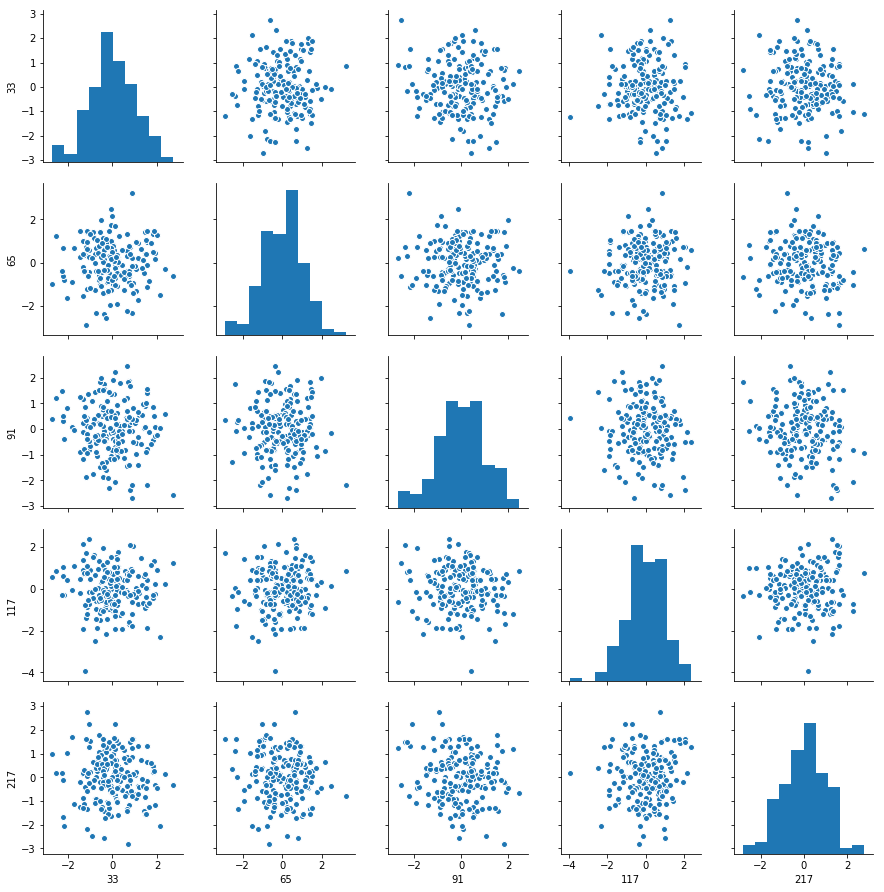

In [290]:
import seaborn as sns
sns.pairplot(pd.DataFrame(X_train, columns = selected_features))

In [359]:
submissions['target'] = lgr.predict(X_test0)

In [360]:
submissions.to_csv('submissions2.csv',index = False)

In [361]:
submissions['target'].value_counts()

1.0    13461
0.0     6289
Name: target, dtype: int64

# K-fold logistic regression

In [252]:

X_train,  X_test, y_train, y_test = train_test_split(X_train0, y_train0,stratify = y_train0, 
                                                    test_size = 0.25, random_state = 42)

In [253]:
type(X_train)

numpy.ndarray

In [382]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
skfolds = StratifiedKFold(n_splits = 5, random_state = 42)
estimators = []
for train_index, test_index in skfolds.split(X_train, y_train):
    #print(train_index)
    #print(X_train[train_index,:])
    lgr = LogisticRegression(random_state=42,verbose = True)
    X_train_folds = X_train[train_index,:]
    y_train_folds = y_train[train_index]
    X_test_fold = X_train[test_index,:]
    y_test_fold = y_train[test_index]
    lgr.fit(X_train_folds, y_train_folds)
    estimators.append(lgr)
    y_pred = lgr.predict(X_test_fold)
    print(classification_report(y_test_fold, y_pred))
   

[LibLinear]             precision    recall  f1-score   support

        0.0       0.92      0.79      0.85        14
        1.0       0.88      0.96      0.92        24

avg / total       0.90      0.89      0.89        38

[LibLinear]             precision    recall  f1-score   support

        0.0       0.69      0.64      0.67        14
        1.0       0.80      0.83      0.82        24

avg / total       0.76      0.76      0.76        38

[LibLinear]             precision    recall  f1-score   support

        0.0       0.71      0.38      0.50        13
        1.0       0.73      0.92      0.81        24

avg / total       0.73      0.73      0.70        37

[LibLinear]             precision    recall  f1-score   support

        0.0       0.70      0.54      0.61        13
        1.0       0.78      0.88      0.82        24

avg / total       0.75      0.76      0.75        37

[LibLinear]             precision    recall  f1-score   support

        0.0       0.67      0.9

In [384]:
y_pred = estimators[0].predict(X_test0)

In [387]:
submissions['target'] = estimators[0].predict(X_test0)

In [388]:
submissions['target'].value_counts()

1.0    13244
0.0     6506
Name: target, dtype: int64

In [394]:
submissions.to_csv('submissions3.csv', index = False)

In [383]:
X_train_folds.shape, y_train_folds.shape, X_test_fold.shape, y_test_fold.shape

((150, 9), (150,), (37, 9), (37,))

In [364]:
from sklearn.ensemble import VotingClassifier

In [371]:
ensemble = VotingClassifier(estimators = estimators, voting = 'soft')

In [377]:
ensemble.fit(X_train, y_train)

TypeError: zip argument #1 must support iteration

In [366]:
ensemble.predict(X_test)

NotFittedError: This VotingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [218]:
pd.DataFrame(X_train_folds).describe()

,0,1
count,93.000000,93.000000
mean,-0.239097,0.033699
std,0.920003,1.037104
min,-2.457000,-2.799000
25%,-0.792000,-0.637000
50%,-0.301000,0.125000
75%,0.438000,0.740000
max,1.772000,3.163000


# Random Forest Classsifier


In [292]:
from sklearn.ensemble import RandomForestClassifier
# Converting data into numpy array
X_train0 = train.drop(['id', 'target'], axis = 1)
y_train0 = train['target']
X_test0  = test.drop('id', axis = 1)

In [325]:
X_train0 =X_train0[selected_features]
X_test0 = X_test0[selected_features]
#y_train0 = y_train0

X_train,  X_test, y_train, y_test = train_test_split(X_train0, y_train0,stratify = y_train0, 
                                                    test_size = 0.25, random_state = 42)

In [326]:
rf = RandomForestClassifier(n_estimators = 500, random_state = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [327]:
importances = rf.feature_importances_

In [328]:
import numpy as np
indices = np.argsort(importances)[::-1]

In [329]:
indices

array([0, 1, 3, 2, 4], dtype=int64)

In [330]:
for f in range(X_train.shape[1]):
    print('%2d %-s %f'%(f, X_train.columns[indices[f]], importances[indices[f]]))

 0 33 0.247302
 1 65 0.209200
 2 117 0.204596
 3 91 0.172741
 4 217 0.166160


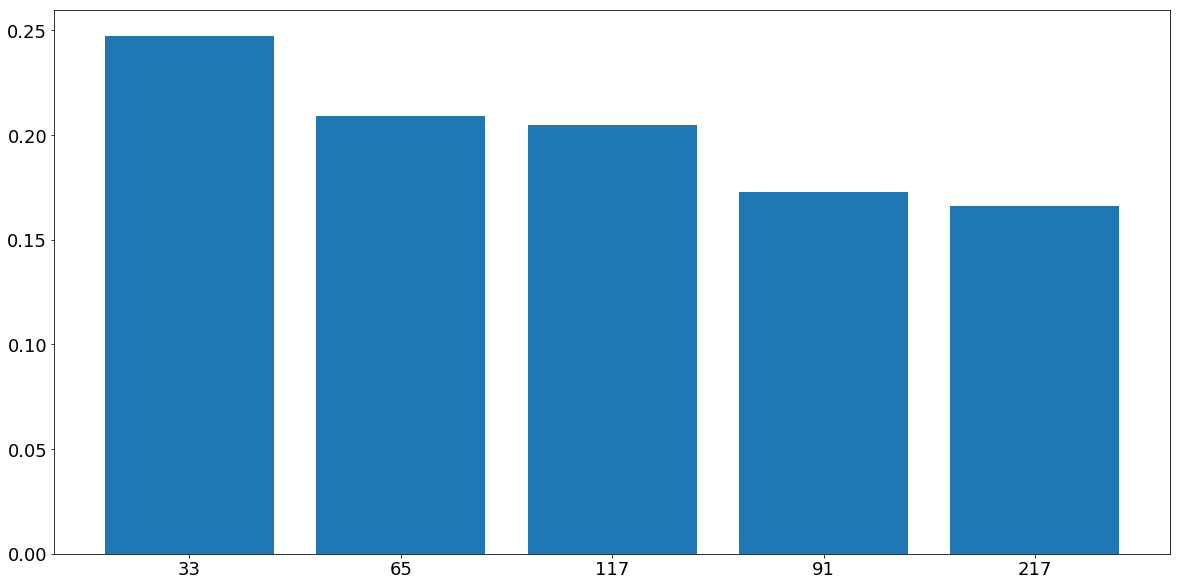

In [333]:
plt.figure(figsize=(20,10))

from matplotlib import pyplot as plt
plt.bar(range(5), importances[indices[0:5]])
plt.xticks(range(5), X_train.columns[indices[0:5]])
plt.tick_params(labelsize = 18)



In [26]:
skfolds = StratifiedKFold(n_splits = 11, random_state = 42)

In [334]:
pred = rf.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[13 10]
 [ 6 34]]
             precision    recall  f1-score   support

        0.0       0.68      0.57      0.62        23
        1.0       0.77      0.85      0.81        40

avg / total       0.74      0.75      0.74        63



In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
lgr = LogisticRegression()
pipe_lr = make_pipeline(StandardScaler(), PCA(n_components = 2), LogisticRegression(random_state =1))
pipe_lr.fit(X_train, y_train)                        

In [96]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [125]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']
X_test = test.drop(['id'], axis=1)
n_fold = 20
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
repeated_folds = RepeatedStratifiedKFold(n_splits=10, n_repeats=20, random_state=42)

X_train,  X_test, y_train, y_test = train_test_split(X_train, y_train,stratify = y_train, 
                                                    test_size = 0.25, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [126]:
# A lot of people are using logreg currently, let's try
model = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')

In [127]:
model.fit(X_train,y_train)

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [128]:
labels = model.predict(X_test)

In [129]:
from sklearn.metrics import confusion_matrix

In [130]:
y_test.shape, labels.shape

((63,), (63,))

In [131]:
print(confusion_matrix(y_test, labels))

[[14  9]
 [10 30]]


In [132]:
44/63*100

69.84126984126983

In [395]:
from sklearn.linear_model import LogisticRegressionCV, SGDClassifier
lcv = LogisticRegressionCV(penalty="l1",
                           Cs=100,
                           cv=50,
                           solver="liblinear",
                           verbose=50)
lcv.fit(X_train, y_train)

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear

LogisticRegressionCV(Cs=100, class_weight=None, cv=50, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=50)

In [403]:
# prediction
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
skf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10, random_state=2434)
y_oof = np.zeros(y_train.shape)
y_pred = np.zeros(X_test0.shape[0])

for dev, val in tqdm(skf.split(X_train, y_train), total=100):
    X_dev = X_train[dev]
    y_dev = y_train[dev]
    X_val = X_train[val]
    lr = LogisticRegression(penalty="l1", C=lcv.C_[0], solver="liblinear")
    lr.fit(X_dev, y_dev)
    y_oof[val] += lr.predict_proba(X_val)[:, 1] / 10
    y_pred += lr.predict_proba(X_test0)[:, 1] / 100

100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 614.07it/s]


In [400]:
from tqdm import tqdm

In [404]:
# cv score(auc)
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_oof)

0.8218905472636816

In [412]:
y_pred = [1 if i >0.5 else 0 for i in y_pred]

In [413]:
submissions_lasso = submissions

In [415]:
submissions_lasso['target'] = y_pred

In [416]:
submissions_lasso['target'].value_counts()

1    13677
0     6073
Name: target, dtype: int64

In [417]:
submissions_lasso.to_csv('submissions_lasso.csv', index = False)

In [1]:


import pystan                                                                                                                                        
import pandas as pd                                                                                  
import numpy as np                                                                                   
                                                                                                     
code = """                                                                                           
data {                                                                                               
  int N; //the number of training observations                                                       
  int N2; //the number of test observations                                                          
  int K; //the number of features                                                                    
  int y[N]; //the response                                                                           
  matrix[N,K] X; //the model matrix                                                                  
  matrix[N2,K] new_X; //the matrix for the predicted values                                          
}                                                                                                    
parameters {                                                                                         
  real alpha;                                                                                        
  vector[K] beta; //the regression parameters                                                        
}                                                                                                    
transformed parameters {                                                                             
  vector[N] linpred;                                                                                 
  linpred = alpha+X*beta;                                                                            
}                                                                                                    
model {                                                                                              
  alpha ~ cauchy(0,10); //prior for the intercept following Gelman 2008                              
                                                                                                     
  for(i in 1:K)                                                                                      
    beta[i] ~ student_t(1, 0, 0.03);                                                                 
                                                                                                     
  y ~ bernoulli_logit(linpred);                                                                      
}                                                                                                    
generated quantities {                                                                               
  vector[N2] y_pred;                                                                                 
  y_pred = alpha+new_X*beta; //the y values predicted by the model                                   
}                                                                                                    
"""               

#train = pd.read_csv('../input/train.csv')                                                            
#train.pop('id')                                                                                      
#target = train.pop('target').astype(int)                                                             
                                                                                                     
#test = pd.read_csv('../input/test.csv')                                                              
#ids = test.pop('id')                                                                                 
                                                                                                     
data = {                                                                                             
    'N': 250,                                                                                        
    'N2': 19750,                                                                                     
    'K': 300,                                                                                        
    'y': y_train0,                                                                                     
    'X': X_train0,                                                                                      
    'new_X': X_test0,                                                                                   
}                                                                                                    
                                                                                                     
sm = pystan.StanModel(model_code=code)                                                               
fit = sm.sampling(data=data, seed=1234)                                                              
ex = fit.extract(permuted=True)                                                                      
target = np.mean(ex['y_pred'], axis=0)                                                               
df = pd.DataFrame({'id': ids, 'target': target})                                                     
df[['id', 'target']].to_csv('submission_stan.csv', index=False)   

NameError: name 'y_train0' is not defined

In [7]:
>>> import distutils
>>> print(distutils.__file__)

c:\program files\python36\lib\distutils\__init__.py


In [10]:
import pystan
model_code = 'parameters {real y;} model {y ~ normal(0,1);}'
model = pystan.StanModel(model_code=model_code)
y = model.sampling().extract()['y']
y.mean()  # with luck the result will be near 0


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5944b02c79788fa0db5b3a93728ca2bf NOW.


TypeError: '>=' not supported between instances of 'NoneType' and 'str'